# Retrieve DDL measurements

In [1]:
import logging
import matplotlib.pyplot as plt
import ddlpy

# show what's happening in the background
# this makes sure that we see log messages in the notebook
logging.basicConfig()
# show log messages of ddlpy
logging.getLogger("ddlpy").setLevel(logging.DEBUG)


## Get a list of all known locations
The  method locations gets a list of all known measurement locations by sending a request. 

In [2]:
locations = ddlpy.locations()

DEBUG:ddlpy.ddlpy:Requesting at https://waterwebservices.rijkswaterstaat.nl/METADATASERVICES_DBO/OphalenCatalogus with request: {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Groeperingen": true, "Parameters": true, "Compartimenten": true}}


In [3]:
locations.to_json(r'locations.json', orient='records')

In [4]:
## also add code as a variable
locations['Code'] = locations.index
locations.head()

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,
ROTTMPT3,9486,25831,735924.084551,5.941073e+06,Rottumerplaat 3 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,ROTTMPT3
SCHOUWN10,9510,25831,534120.858324,5.729921e+06,Schouwen 10 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHOUWN10
TERSLG235,9518,25831,509938.998556,6.113888e+06,Terschelling 235 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,TERSLG235
WALCRN2,9526,25831,528394.396027,5.710854e+06,Walcheren 2 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,WALCRN2
GOERE6,9542,25831,560056.490959,5.746818e+06,Goeree 6 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,GOERE6


## Validate
Check  if data is in the domain of the Netherlands. It also includes data of the North Sea.

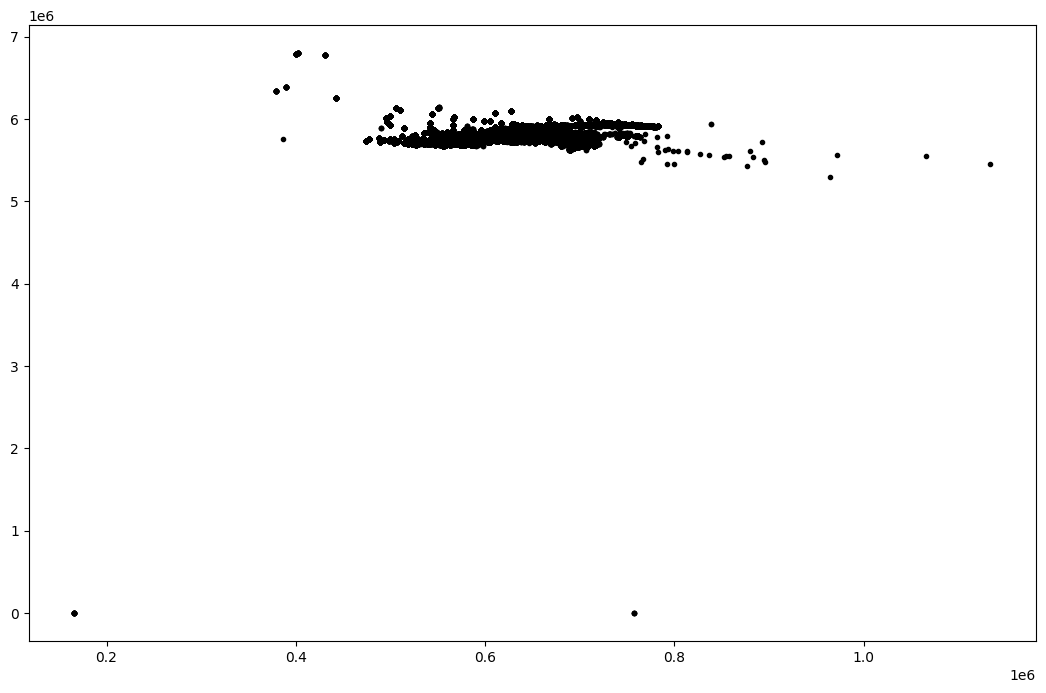

In [5]:
## Create a spatial plot
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(locations.X, locations.Y, 'k.')

In [6]:
# CHECK See what the data in the east is.
# These is a reference river for water quality near Chernobyl. 
locations.sort_values('X',  ascending=False).head(n=5)

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,
RIEDBG,11039,25831,1.133985e+06,5.460049e+06,Riedenburg,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,RIEDBG
BAMBG,13481,25831,1.066035e+06,5.555525e+06,Bamberg,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,BAMBG
STEINBCH,11103,25831,9.715529e+05,5.559332e+06,Steinbach,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,STEINBCH
KONSZ,13512,25831,9.642014e+05,5.295846e+06,Konstanz,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,KONSZ
SPEYER,11067,25831,8.958191e+05,5.477785e+06,Speyer,Waterhoogte Oppervlaktewater t.o.v. plaatselij...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,PLAATSLR,t.o.v. plaatselijk referentievlak,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SPEYER


In [7]:
bool_stations = locations.index.isin(['HOEKVHLD', 'IJMDBTHVN','SCHEVNGN'])
bool_grootheid = locations['Grootheid.Code'].isin(['WATHTE']) # measured (WATHTE) versus computed/astro
bool_groepering = locations['Groepering.Code'].isin(['NVT']) # timeseries (NVT) versus extremes
bool_hoedanigheid = locations['Hoedanigheid.Code'].isin(['NAP']) # vertical reference (NAP/MSL)
selected = locations.loc[bool_stations & bool_grootheid & bool_groepering & bool_hoedanigheid]
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,
HOEKVHLD,10399,25831,576917.669784,5.759136e+06,Hoek van Holland,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,HOEKVHLD
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHEVNGN
IJMDBTHVN,10414,25831,605633.035699,5.813598e+06,IJmuiden buitenhaven,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,IJMDBTHVN


In [8]:
names = 'uit de kust'
selected = locations[locations.Naam.str.contains(names)].head()
selected

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,
ROTTMPT3,9486,25831,735924.084551,5.941073e+06,Rottumerplaat 3 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,ROTTMPT3
SCHOUWN10,9510,25831,534120.858324,5.729921e+06,Schouwen 10 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHOUWN10
TERSLG235,9518,25831,509938.998556,6.113888e+06,Terschelling 235 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,TERSLG235
WALCRN2,9526,25831,528394.396027,5.710854e+06,Walcheren 2 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,WALCRN2
GOERE6,9542,25831,560056.490959,5.746818e+06,Goeree 6 km uit de kust,Korrelgroottefractie Bodem/Sediment diameter g...,BS,Bodem/Sediment,%,procent,KGF,Korrelgroottefractie,Dg0016dg,diameter groter dan 16 um / drooggewicht,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,GOERE6


In [9]:
# numtiple parameters avaialble per location
# each combination is a row
records = locations.loc['SCHEVNGN']
records

,Locatie_MessageID,Coordinatenstelsel,X,Y,Naam,Parameter_Wat_Omschrijving,Compartiment.Code,Compartiment.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Code
Code,,,,,,,,,,,,,,,,,,,
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte berekend Oppervlaktewater t.o.v. N...,OW,Oppervlaktewater,cm,centimeter,WATHTBRKD,Waterhoogte berekend,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,GETETBRKD2,Getijextreem berekend,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte berekend Oppervlaktewater t.o.v. N...,OW,Oppervlaktewater,cm,centimeter,WATHTBRKD,Waterhoogte berekend,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,GETETM2,Getijextremen,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte Oppervlaktewater t.o.v. Normaal Am...,OW,Oppervlaktewater,cm,centimeter,WATHTE,Waterhoogte,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Waterhoogte astronomisch Oppervlaktewater t.o....,OW,Oppervlaktewater,cm,centimeter,WATHTEASTRO,Waterhoogte astronomisch,NAP,t.o.v. Normaal Amsterdams Peil,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Levendigheid Oppervlaktewater cm2,OW,Oppervlaktewater,cm2,vierkante centimeter,NVT,Waarde is niet van toepassing,NVT,niet van toepassing,NVT,Waarde is niet van toepassing,NVT,Niet van toepassing,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Getijextreemtype Oppervlaktewater,OW,Oppervlaktewater,DIMSLS,dimensieloos,NVT,Waarde is niet van toepassing,NVT,niet van toepassing,NVT,Waarde is niet van toepassing,GETETBRKD2,Getijextreem berekend,SCHEVNGN
SCHEVNGN,10406,25831,586550.994421,5.772806e+06,Scheveningen,Getijextreemtype Oppervlaktewater,OW,Oppervlaktewater,DIMSLS,dimensieloos,NVT,Waarde is niet van toepassing,NVT,niet van toepassing,NVT,Waarde is niet van toepassing,GETETM2,Getijextremen,SCHEVNGN


In [10]:
# if we pass one row to the measurements function you can get all the measurements
measurements = ddlpy.measurements(records.iloc[0], "2019-01-01", "2020-02-01")

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.48it/s]
DEBUG:ddlpy.ddlpy:0 duplicated values dropped


<Axes: xlabel='time'>

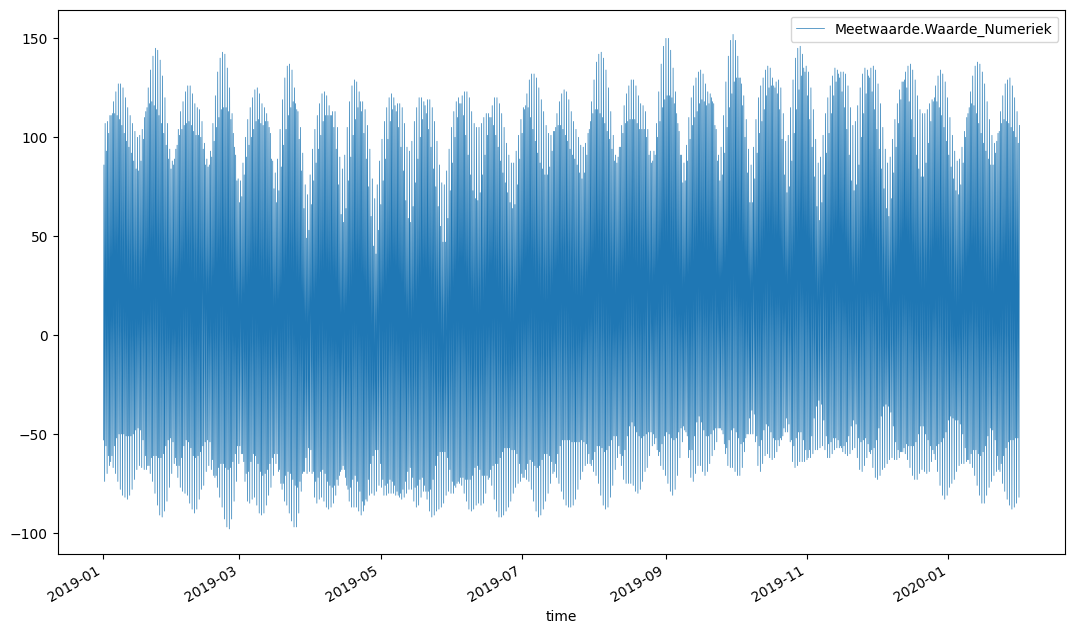

In [11]:
measurements.plot(y='Meetwaarde.Waarde_Numeriek', linewidth=0.5, figsize=(13, 8))

In [12]:
measurements

,WaarnemingMetadata.StatuswaardeLijst,WaarnemingMetadata.BemonsteringshoogteLijst,WaarnemingMetadata.ReferentievlakLijst,WaarnemingMetadata.OpdrachtgevendeInstantieLijst,WaarnemingMetadata.KwaliteitswaardecodeLijst,AquoMetadata_MessageID,Parameter_Wat_Omschrijving,BemonsteringsApparaat.Code,BemonsteringsApparaat.Omschrijving,BemonsteringsMethode.Code,...,WaardeBepalingsmethode.Omschrijving,WaardeBewerkingsmethode.Code,WaardeBewerkingsmethode.Omschrijving,Meetwaarde.Waarde_Numeriek,Meetwaarde.Waarde_Alfanumeriek,Code,Coordinatenstelsel,Naam,X,Y
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 07:15:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-53.0,-53,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 11:25:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,86.0,86,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 19:20:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-74.0,-74,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-01 23:56:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,107.0,107,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2019-01-02 08:18:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-56.0,-56,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-30 18:44:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,113.0,113,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2020-01-31 02:24:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,-52.0,-52,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06
2020-01-31 07:02:00+01:00,Ongecontroleerd,-999999999,NVT,RIKZMON_WAT,00,10846,Waterhoogte berekend Oppervlaktewater t.o.v. N...,NVT,Waarde is niet van toepassing,NVT,...,Astronomische waterhoogte mbv harmonische analyse,NVT,Niet van toepassing,97.0,97,SCHEVNGN,25831,Scheveningen,586550.994421,5.772806e+06


## Convert to xarray

In [13]:
drop_if_constant = ["WaarnemingMetadata.OpdrachtgevendeInstantieLijst",
                    "WaarnemingMetadata.BemonsteringshoogteLijst",
                    "WaarnemingMetadata.ReferentievlakLijst",
                    "AquoMetadata_MessageID", 
                    "BioTaxonType",
                    "BemonsteringsSoort.Code", 
                    "Compartiment.Code", "Eenheid.Code", "Grootheid.Code", "Hoedanigheid.Code",
                    ]
ds = ddlpy.dataframe_to_xarray(measurements, drop_if_constant=drop_if_constant)
ds

<xarray.Dataset> Size: 73kB
Dimensions:                                       (time: 1530)
Coordinates:
  * time                                          (time) datetime64[ns] 12kB ...
Data variables:
    WaarnemingMetadata.StatuswaardeLijst          (time) object 12kB 'Ongecon...
    WaarnemingMetadata.KwaliteitswaardecodeLijst  (time) object 12kB '00' ......
    Groepering.Code                               (time) object 12kB 'GETETBR...
    WaardeBepalingsmethode.Code                   (time) object 12kB 'other:F...
    Meetwaarde.Waarde_Numeriek                    (time) float64 12kB -53.0 ....
Attributes: (12/27)
    BemonsteringsApparaat.Code:                        NVT
    BemonsteringsMethode.Code:                         NVT
    BemonsteringsSoort.Code:                           NVT
    BioTaxon.Code:                                     NVT
    BioTaxon_Compartiment.Code:                        NVT
    MeetApparaat.Code:                                 NVT
    ...                                                ...
    Hoedanigheid.Code:                                 NAP
    Code:                                              SCHEVNGN
    Naam:                                              Scheveningen
    Coordinatenstelsel:                                25831
    X:                                                 586550.994420996
    Y:                                                 5772806.43069697